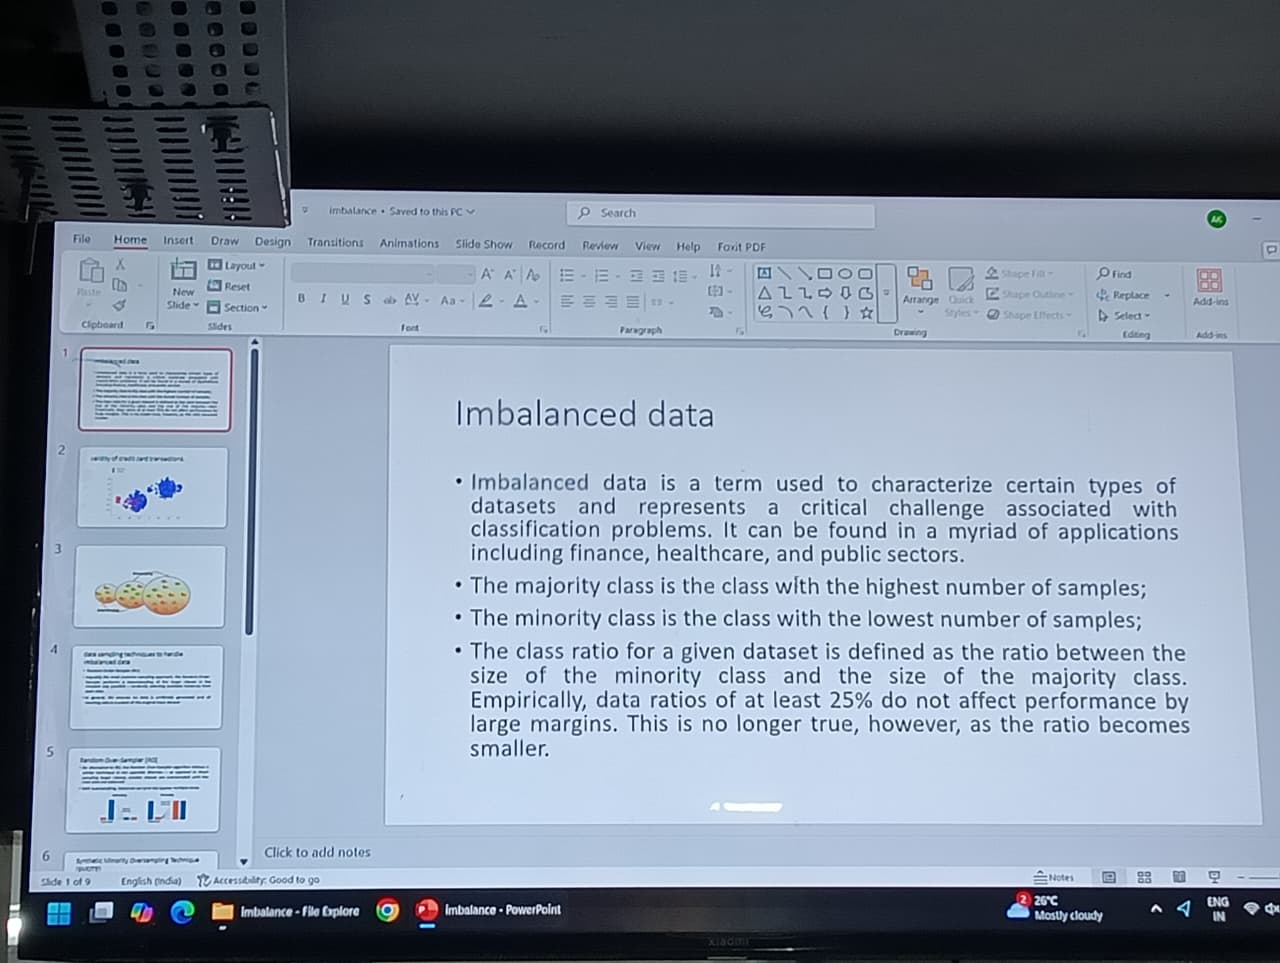

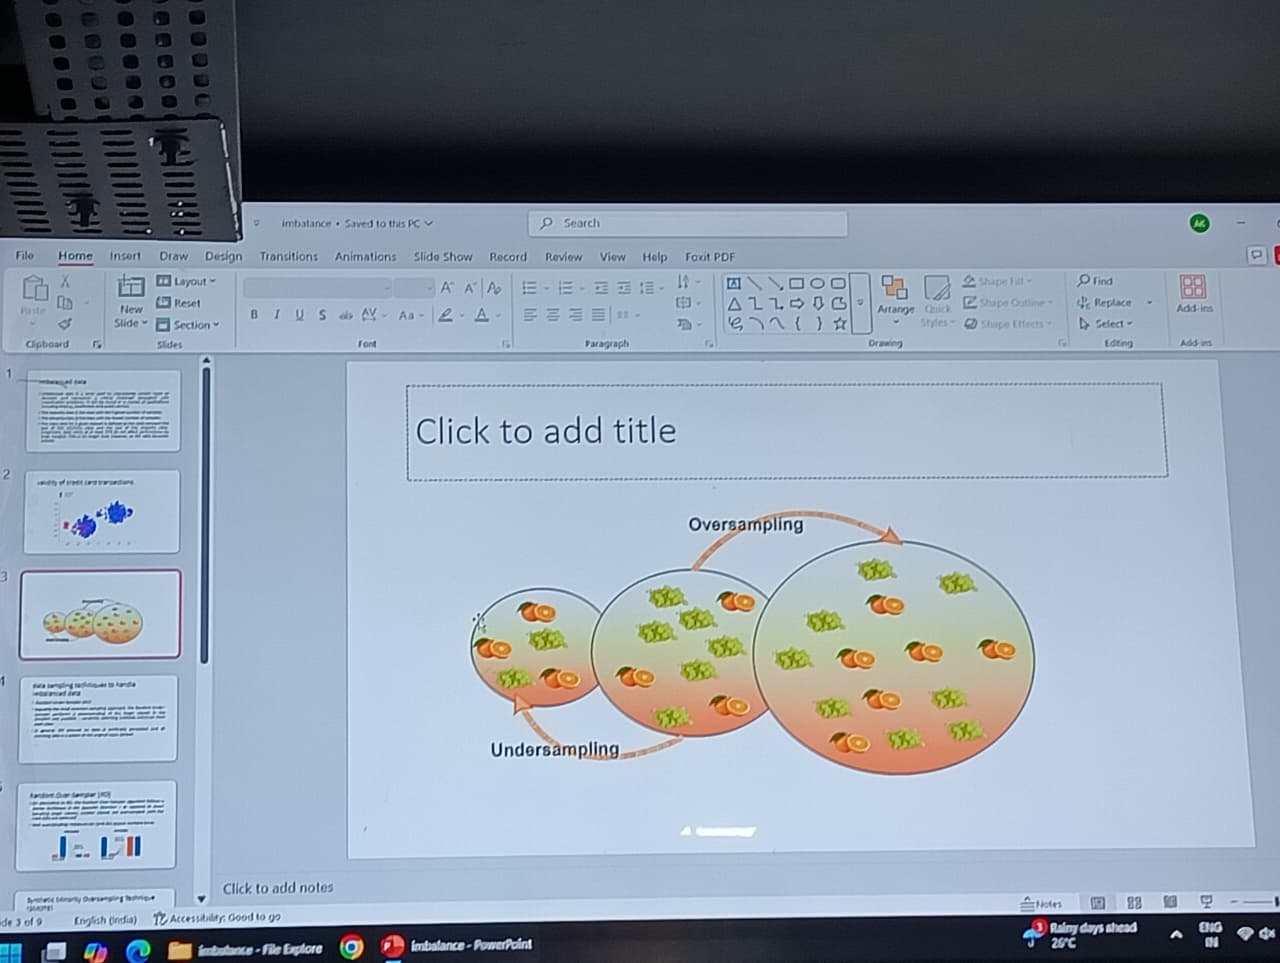

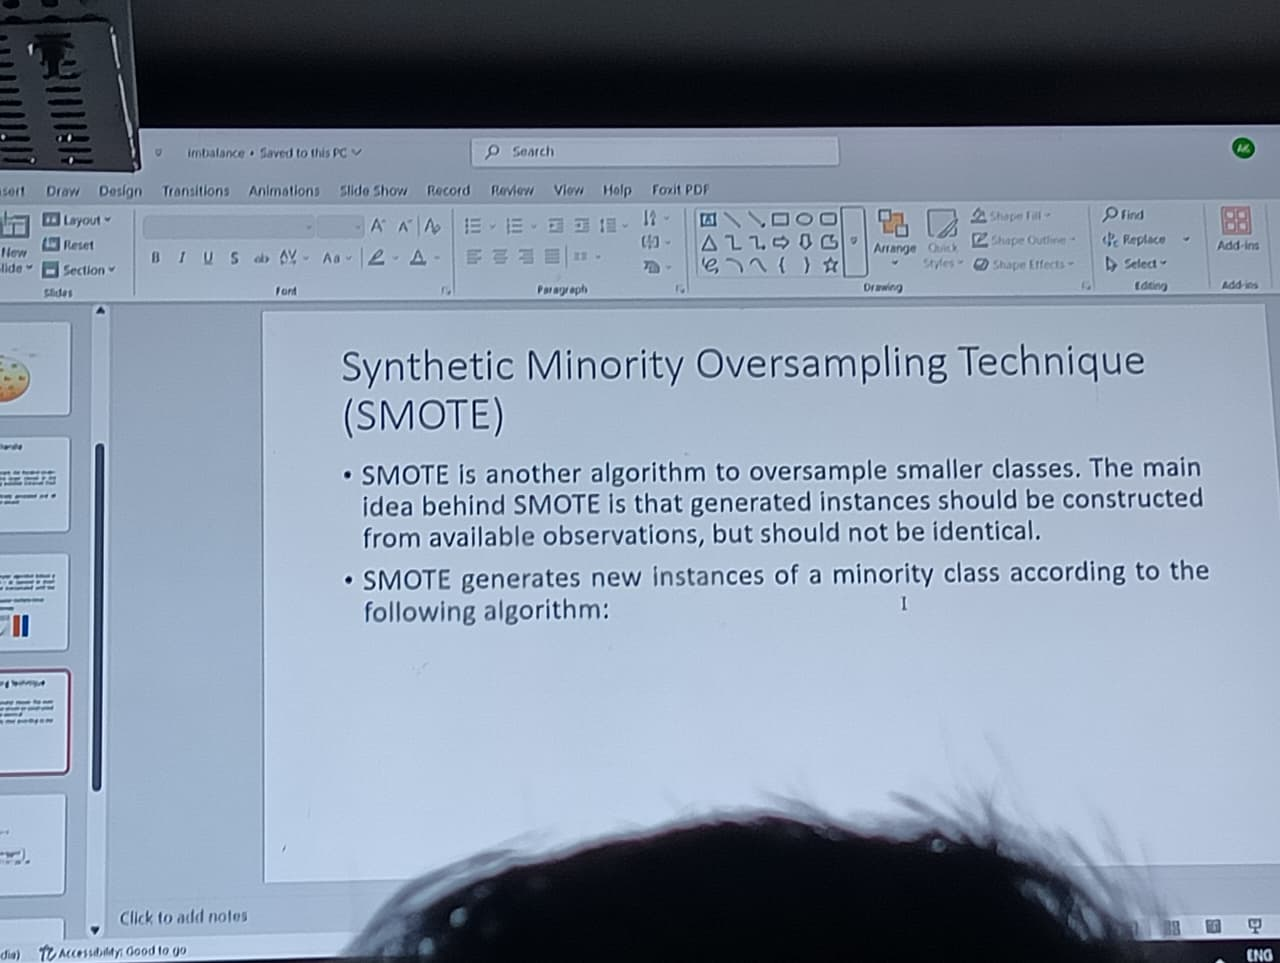

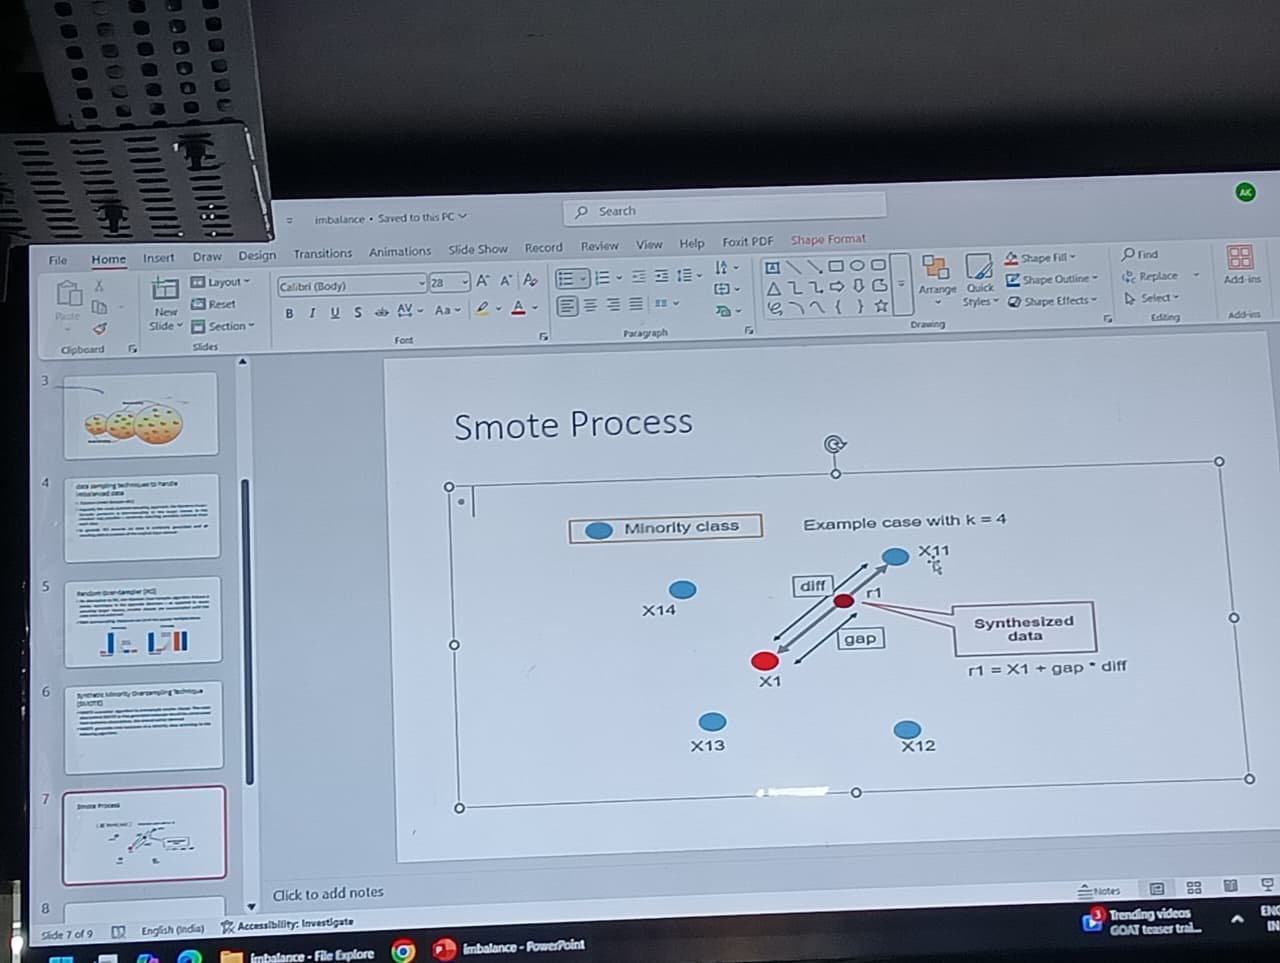

![WhatsApp Image 2025-08-25 at 18.31.20_98c6cf04.jpg](<attachment:WhatsApp Image 2025-08-25 at 18.31.20_98c6cf04.jpg>)
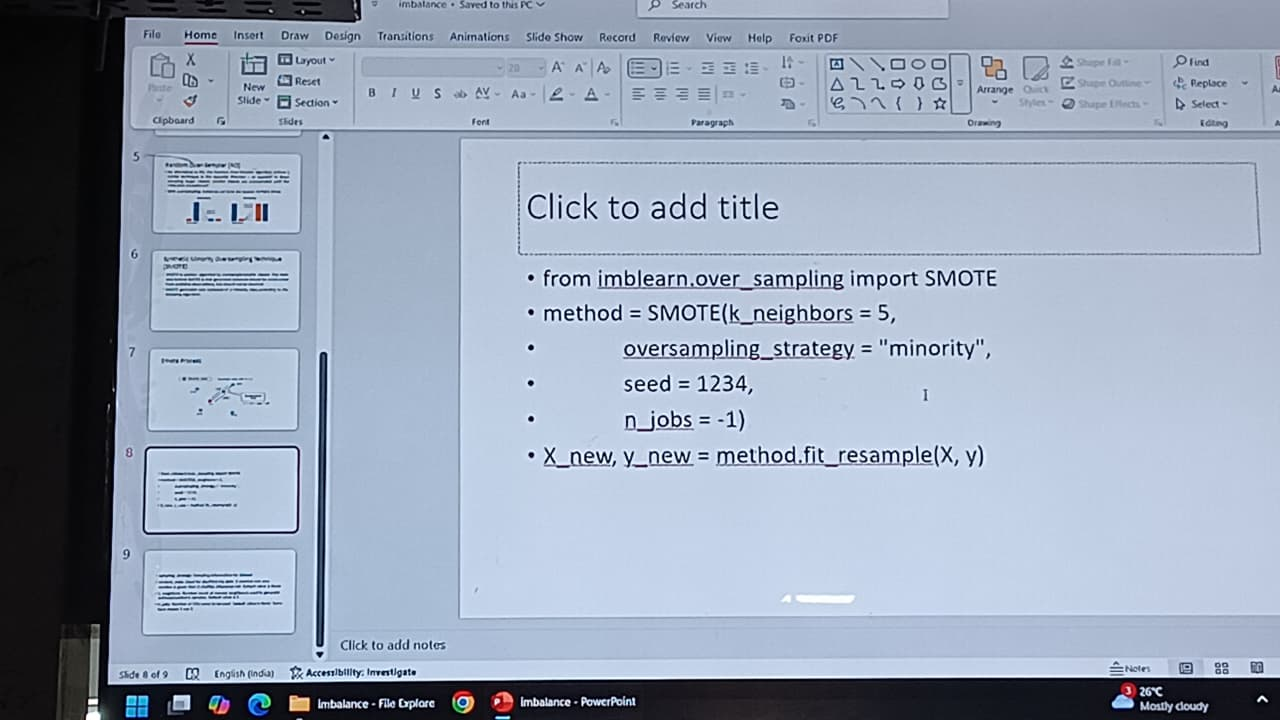

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv(r"C:\Users\AVANISH SINGH\OneDrive\Desktop\Excel_machine\insurance.csv")

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
# df['region'] = le.fit_transform(df['region'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [14]:
x = df[['age','bmi','children','charges','smoker','sex']]
y = df['region']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE

# use random_state instead of seeds
method = SMOTE(k_neighbors=5, random_state=12345, sampling_strategy='minority')

X_new, y_new = method.fit_resample(x_train, y_train)


In [19]:
X_new.value_counts()

age  bmi     children  charges      smoker  sex
18   15.960  0         1694.79640   0       1      1
     17.290  2         12829.45510  1       1      1
     20.790  0         1607.51010   0       0      1
     21.565  0         13747.87235  1       1      1
     21.660  0         14283.45940  1       0      1
                                                  ..
64   38.190  0         14410.93210  0       1      1
     39.050  3         16085.12750  0       0      1
     39.160  1         14418.28040  0       1      1
     39.330  0         14901.51670  0       0      1
     39.700  0         14319.03100  0       0      1
Name: count, Length: 1097, dtype: int64

In [17]:
y_new.value_counts()

region
1    283
2    283
0    267
3    264
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_new, y_new)
model.score(x_test, y_test)

0.35447761194029853